## LAB<sup>6-4</sup> 비선형 SVM을 이용한 데이터 분류

**실습목표**

아래의 URL로 접근하면 선형 분리가 불가능하도록 섞여있는 두 종류의 데이터 인스턴스들이 있다.

https://github.com/dknife/ML/raw/main/data/twisted_data.csv

이 데이터 인스턴스들을 분류할 수 있도록 SVM을 학습시켜 보라.

1. 우선 데이터를 지정된 URL에서 읽어 들여 살펴보자.

In [1]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')
print(df.tail(5))

           x1        x2  y
995  1.112475 -0.180790  0
996 -2.544258 -0.559755  0
997 -1.044663  0.164435  1
998 -1.475026 -0.683385  0
999  1.860988  0.728986  1


입력 데이터가 두 개의 특징 x1, x2를 가지고, 각 데이터 인스턴스의 그룹은 y에 지정된 바와 같이 0 또는 1임을 알 수 있다.

2. 데이터가 2차원 입력공간에 어떻게 섞여 있는지 확인하기 위해 y=1인 그룹은 붉은색, y=0인 그룹은 녹색으로 그려 보자. 선형 분리가 불가능한 상태로 섞여 있다.

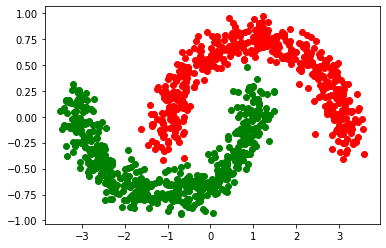

In [2]:
df_positive = df[df['y'] >  0]
df_negative = df[df['y'] == 0]

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

3. 필요한 클래스들을 임포트하여 사용할 수 있게 한다. 데이터의 준비는 이전과 동일하다.

In [3]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.contrib.classifier import DecisionViz
X = df[['x1', 'x2']].to_numpy()
y = df['y']

4. 파이프라인을 이용하여 데이터 표준화와 다항 특징 변환을 한 뒤에 SVM 분류기에 넘기는 형태로 분류기를 만든다. 학습을 시키고 가시화하는 과정은 앞에서 반복적으로 사용한 것과 동일하다.

/home/seungwon/.local/lib/python3.6/site-packages/yellowbrick/contrib/classifier/boundaries.py:440: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cmap=ListedColormap(colors.values()),


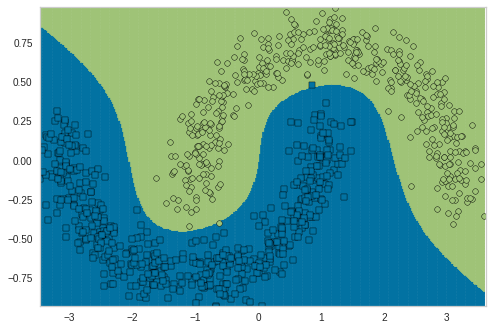

In [4]:
polynomial_svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("poly_features", PolynomialFeatures(degree=5)),
  ("svm_clf", LinearSVC(C=1, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial features SVM")
viz.fit(X, y)
viz.draw(X, y)